Considere o **código de Hamming estendido (8, 4)**, obtido a partir do código de Hamming (7, 4) adicionando um "bit de paridade global" no final de cada palavra de código. (Dessa forma, todas as palavras-código terão um número par de bits 1.)

(a) Determine a matriz geradora $G$ para o código.

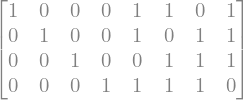

In [2]:
import numpy as np
import itertools as it
import pandas as pd
from sympy import Matrix, init_printing

init_printing()

n = 8
k = 4
m = n - k

G = np.array(
    [
        [1, 0, 0, 0, 1, 1, 0, 1],
        [0, 1, 0, 0, 1, 0, 1, 1],
        [0, 0, 1, 0, 0, 1, 1, 1],
        [0, 0, 0, 1, 1, 1, 1, 0],
    ]
)

display(Matrix(G))

(b) Construa uma tabela mensagem $\rightarrow$ palavra-código 

In [3]:
u = np.array(list(it.product([0, 1], repeat=k)))
v = (u @ G) % 2

df = pd.DataFrame(columns=["u", "v"])

# df["u"] = ["".join(map(str, x)) for x in u]
# df["v"] = ["".join(map(str, x)) for x in v]
df["u"] = u.tolist()
df["v"] = v.tolist()
df = df.set_index("u")

df

,v
u,
"[0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]"
"[0, 0, 0, 1]","[0, 0, 0, 1, 1, 1, 1, 0]"
"[0, 0, 1, 0]","[0, 0, 1, 0, 0, 1, 1, 1]"
"[0, 0, 1, 1]","[0, 0, 1, 1, 1, 0, 0, 1]"
"[0, 1, 0, 0]","[0, 1, 0, 0, 1, 0, 1, 1]"
"[0, 1, 0, 1]","[0, 1, 0, 1, 0, 1, 0, 1]"
"[0, 1, 1, 0]","[0, 1, 1, 0, 1, 1, 0, 0]"
"[0, 1, 1, 1]","[0, 1, 1, 1, 0, 0, 1, 0]"
"[1, 0, 0, 0]","[1, 0, 0, 0, 1, 1, 0, 1]"


Determine a distância mínima e a distribuição de peso das palavras-código

In [4]:
df["hamm_weight"] = df["v"].apply(lambda x: sum(x))

display(df["hamm_weight"].value_counts().sort_index())

d_min = df["hamm_weight"].sort_values()[1:].min()
print(f"d_min = {d_min}")

hamm_weight
0     1
4    14
8     1
Name: count, dtype: int64

d_min = 4


Determine a matriz de verificação $H$ para o código.

In [5]:
H = [
    [1, 1, 0, 1],
    [1, 0, 1, 1],
    [0, 1, 1, 1],
    [1, 1, 1, 0],
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
]

df["validated"] = df["v"].apply(lambda x: ((np.array(x).T @ H) % 2))

df

,v,hamm_weight,validated
u,,,
"[0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]",0,"[0, 0, 0, 0]"
"[0, 0, 0, 1]","[0, 0, 0, 1, 1, 1, 1, 0]",4,"[0, 0, 0, 0]"
"[0, 0, 1, 0]","[0, 0, 1, 0, 0, 1, 1, 1]",4,"[0, 0, 0, 0]"
"[0, 0, 1, 1]","[0, 0, 1, 1, 1, 0, 0, 1]",4,"[0, 0, 0, 0]"
"[0, 1, 0, 0]","[0, 1, 0, 0, 1, 0, 1, 1]",4,"[0, 0, 0, 0]"
"[0, 1, 0, 1]","[0, 1, 0, 1, 0, 1, 0, 1]",4,"[0, 0, 0, 0]"
"[0, 1, 1, 0]","[0, 1, 1, 0, 1, 1, 0, 0]",4,"[0, 0, 0, 0]"
"[0, 1, 1, 1]","[0, 1, 1, 1, 0, 0, 1, 0]",4,"[0, 0, 0, 0]"
"[1, 0, 0, 0]","[1, 0, 0, 0, 1, 1, 0, 1]",4,"[0, 0, 0, 0]"


Construa uma tabela de síndrome $\rightarrow$ padrão de erro


In [46]:
import sys
import numpy

numpy.set_printoptions(threshold=sys.maxsize, linewidth=sys.maxsize)

t = np.floor((d_min - 1) / 2)
print(f"t = {t}")

ap = np.zeros((2**m, 2**k, n), dtype=int)

ap[0, :] = np.array(df["v"].tolist())
ap[1:9, 0] = np.eye(n)

for row in range(1, 9):
    for col in range(1, 2**k):
        ap[row, col] = (ap[0, col] + ap[row, 0]) % 2

# TODO: finalizar esse loop com os padrões de erros
# w2 = list()
# for row in range(9, 2**k):
#     # generate a random row with weight 2
#     error_pattern = np.zeros(n, dtype=int)
#     idx1 = np.random.randint(0, n)
#     idx2 = np.random.randint(0, n)
#     while idx1 == idx2:
#         idx2 = np.random.randint(0, n)
#     error_pattern[idx1] = 1
#     error_pattern[idx2] = 1

#     ap[row, 0] = error_pattern
#     for col in range(1, 2**k):
#         ap[row, col] = (ap[0, col] + ap[row, 0]) % 2
#         if sum(ap[row, col]) == 2:
#             w2.append(ap[row, col])


w_matrix = np.zeros((2**m, 2**k), dtype=int)
for row in range(0, 2**m):
    for col in range(0, 2**k):
        w_matrix[row, col] = sum(ap[row, col])


# Convert each 2D sub-array into a concatenated string and store in a 2D array
str_2d = np.array(["".join(map(str, row)) for layer in ap for row in layer]).reshape(
    ap.shape[0], -1
)

w_matrix

t = 1.0


array([[0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8],
       [1, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 7],
       [1, 5, 5, 5, 3, 3, 3, 3, 5, 5, 5, 5, 3, 3, 3, 7],
       [1, 5, 3, 3, 5, 5, 3, 3, 5, 5, 3, 3, 5, 5, 3, 7],
       [1, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 7],
       [1, 3, 5, 3, 3, 5, 3, 5, 3, 5, 3, 5, 5, 3, 5, 7],
       [1, 3, 3, 5, 5, 3, 3, 5, 3, 5, 5, 3, 3, 5, 5, 7],
       [1, 3, 3, 5, 3, 5, 5, 3, 5, 3, 3, 5, 3, 5, 5, 7],
       [1, 5, 3, 3, 3, 3, 5, 5, 3, 3, 5, 5, 5, 5, 3, 7],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])